# Lecture 15 Exploratory Data Analysis (EDA)
__Math 3080: Fundamentals of Data Science__

Reading:
* a

Machine Learning Process
1. Obtain and Clean Data
2. Wrangle data
3. __Exploratory Data Analysis__
4. Model
5. Evaluate

With EDA, we look at,
* Statistics
* More Graphing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.describe()

We saw how to create one graph in one figure. We can also create multiple graphs. We can use insets as we saw above, or we can use a grid of figures. Here, we have three figures in a row. Let's also see how to make:
* countplots (bar graphs)
* boxplots

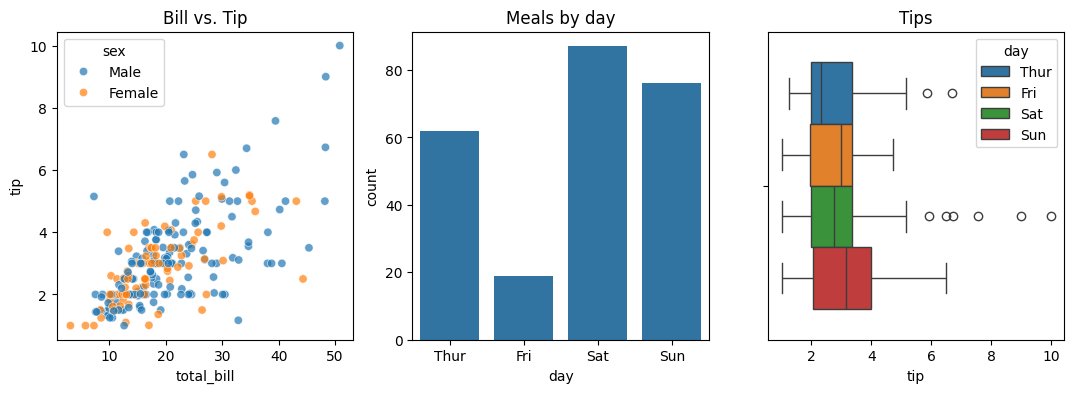

In [2]:
fig, ax = plt.subplots(1,3, figsize=(13,4)) # ax is an array of 3 axes

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', alpha=0.7, ax=ax[0])
ax[0].set_title('Bill vs. Tip')

sns.countplot(data=tips, x='day', ax=ax[1])
ax[1].set_title('Meals by day')

sns.boxplot(data=tips, x='tip', hue='day', ax=ax[2])
ax[2].set_title('Tips')
plt.show()

Now, we'll make a 2x3 grid of figures. Let's also see how to make:
* Histograms
* KDE graphs (1D and 2D)
* Heatmaps

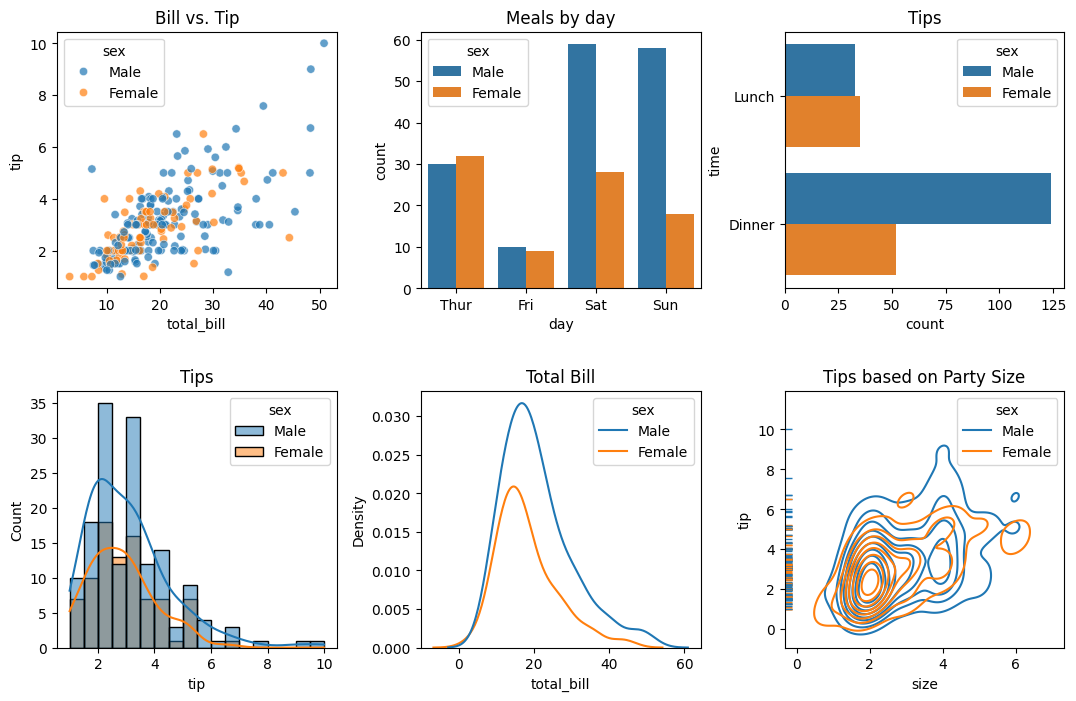

In [23]:
fig, ax = plt.subplots(2,3, figsize=(13,8)) # ax is a matrix of 6 axes

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', alpha=0.7, ax=ax[0,0])
ax[0,0].set_title('Bill vs. Tip')

sns.countplot(data=tips, x='day', ax=ax[0,1], hue='sex')
ax[0,1].set_title('Meals by day')

# Horizontal barplot
sns.countplot(data=tips, y='time', hue='sex', ax=ax[0,2])
ax[0,2].set_title('Tips')

sns.histplot(data=tips, x='tip', ax=ax[1,0], hue='sex', kde=True)
ax[1,0].set_title('Tips')

# KDE plot
sns.kdeplot(data=tips, x='total_bill', hue='sex', ax=ax[1,1])
ax[1,1].set_title('Total Bill')

# 2D KDE plot
sns.kdeplot(data=tips, x='size', y='tip', hue='sex', ax=ax[1,2])
sns.rugplot(data=tips, y='tip', hue='sex', ax=ax[1,2])
ax[1,2].set_title('Tips based on Party Size')

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

## PairGrid

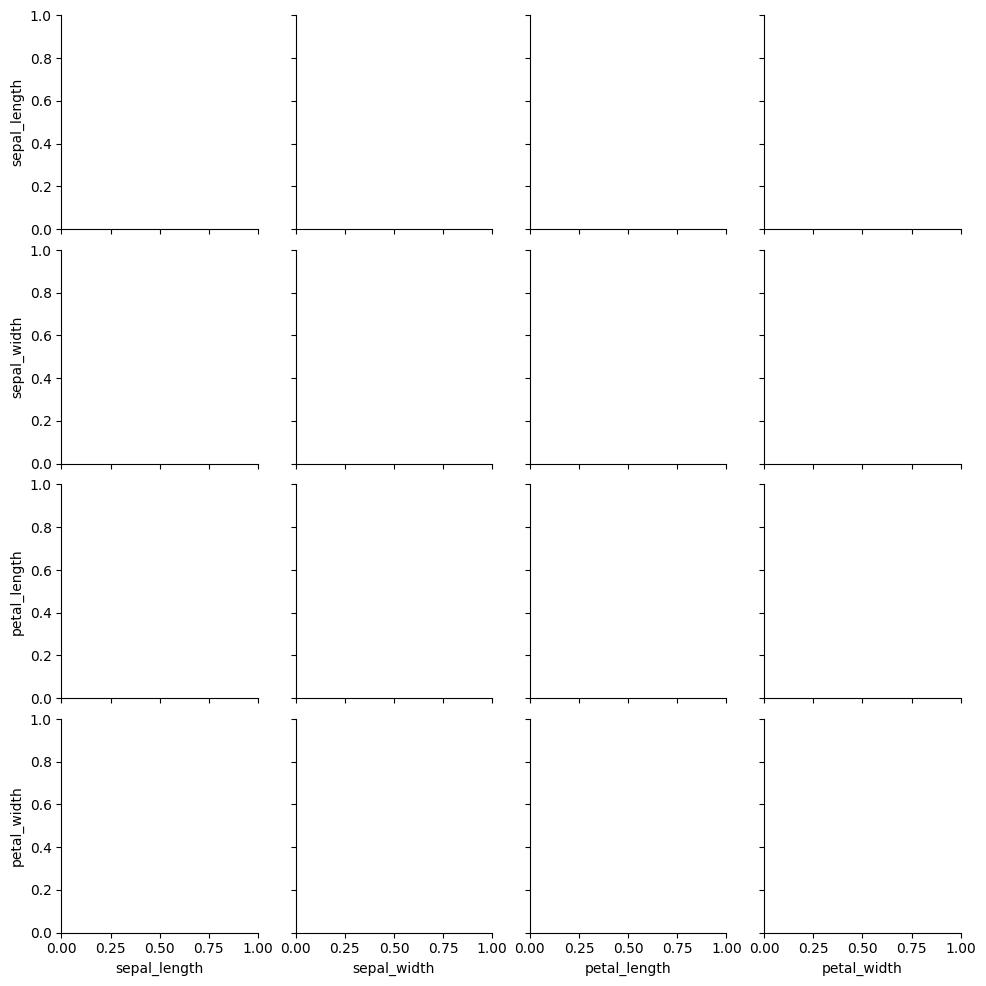

In [16]:
iris = sns.load_dataset('iris')
# Just the Grid
sns.PairGrid(iris)

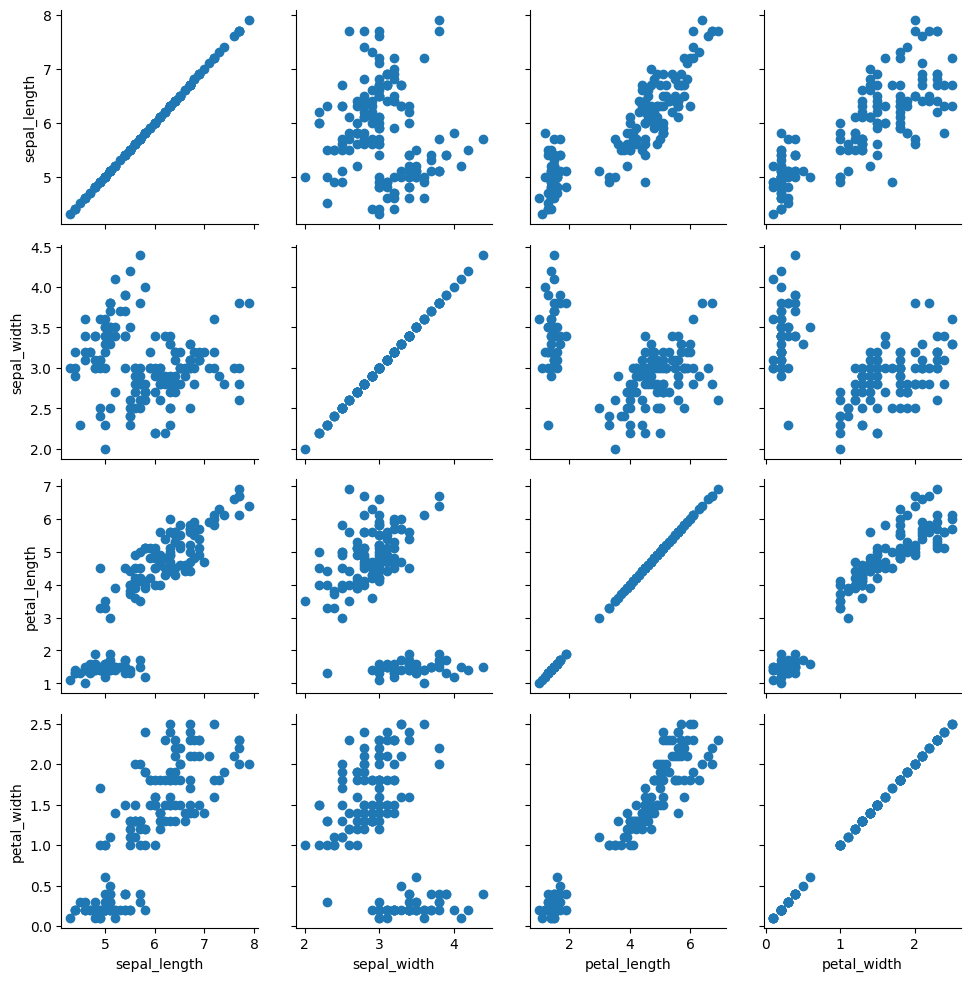

In [17]:
# Then you map to the grid
g = sns.PairGrid(iris)
#g = sns.PairGrid(iris, hue='species')
g.map(plt.scatter)

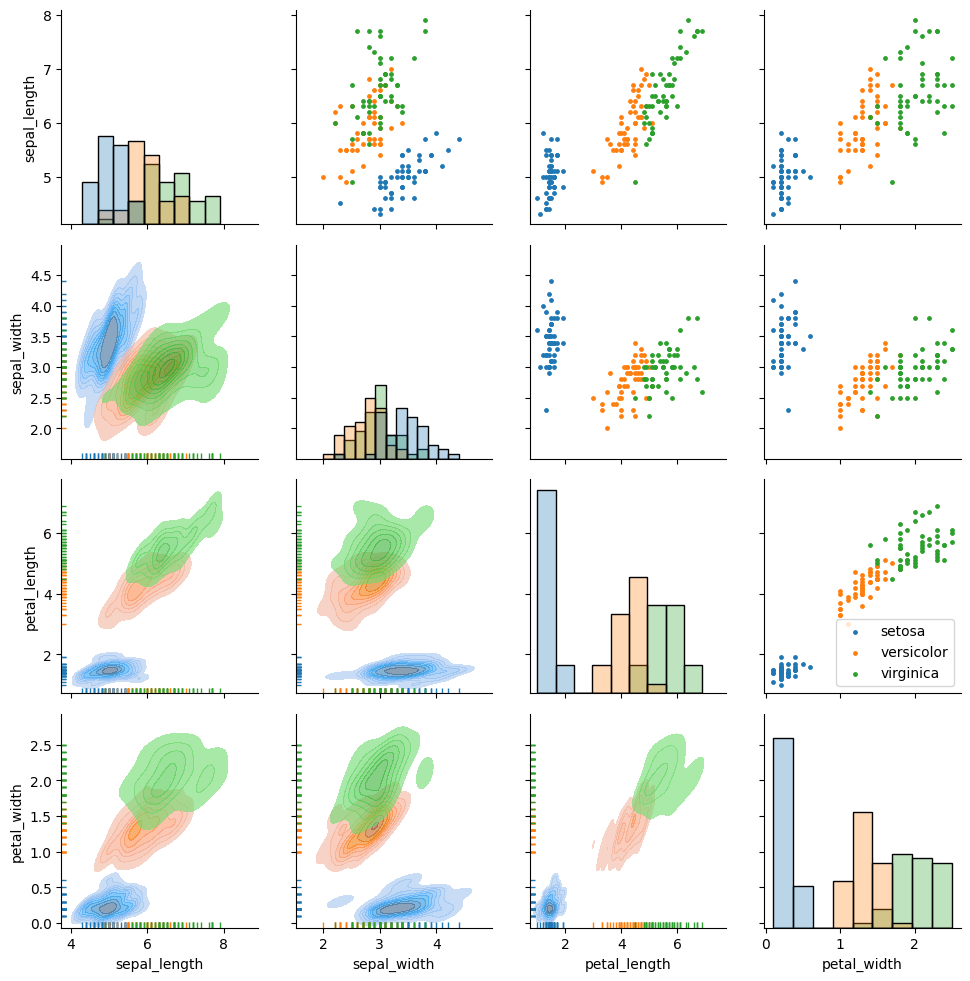

In [32]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris, hue='species')
g.map_diag(sns.histplot, alpha=0.3)
#g.map_diag(sns.kdeplot, fill=True, alpha=0.7)
g.map_upper(plt.scatter, s=6)
g.map_lower(sns.kdeplot, alpha=0.6, fill=True)
g.map_lower(sns.rugplot)

plt.legend()

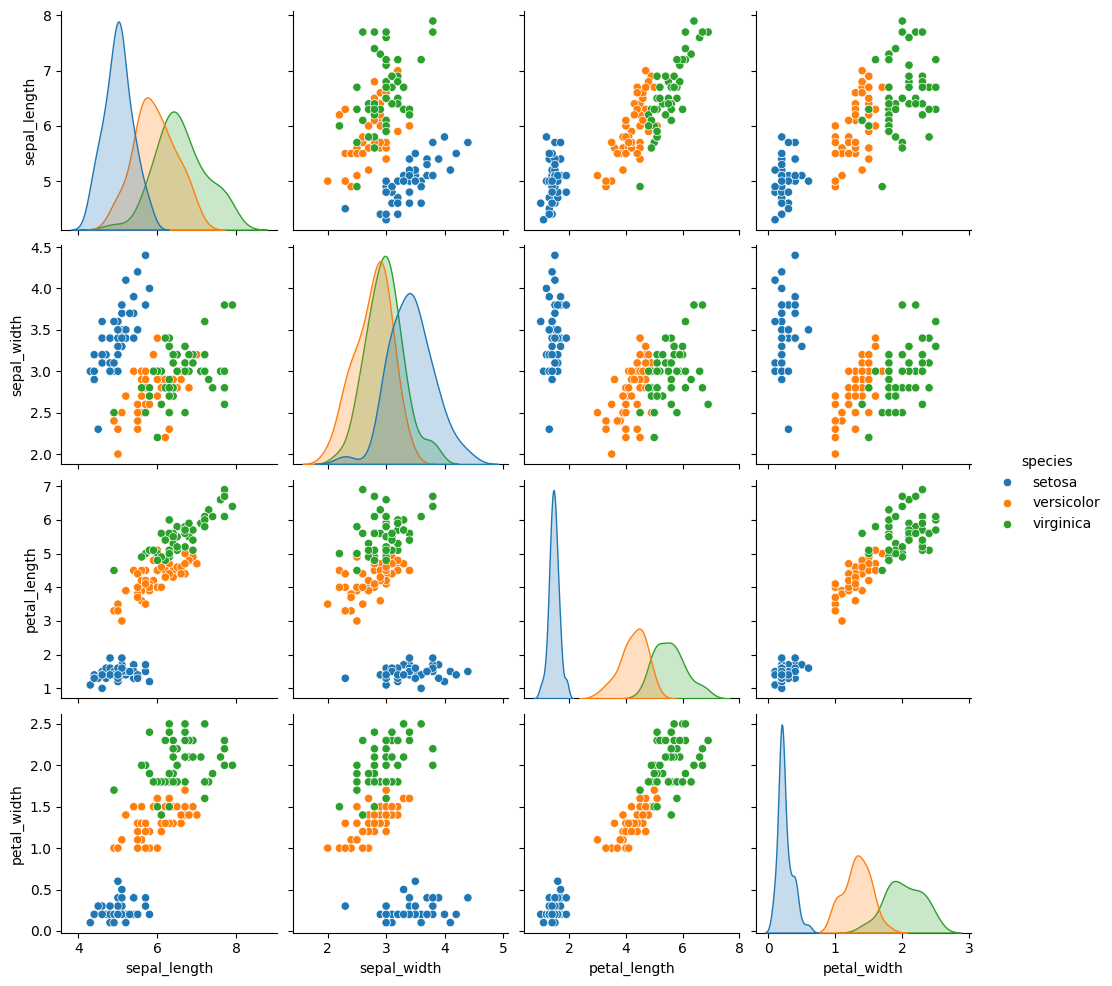

In [10]:
# Simplified PairGrid:
sns.pairplot(iris)
#sns.pairplot(iris, hue='species')

## JointGrid

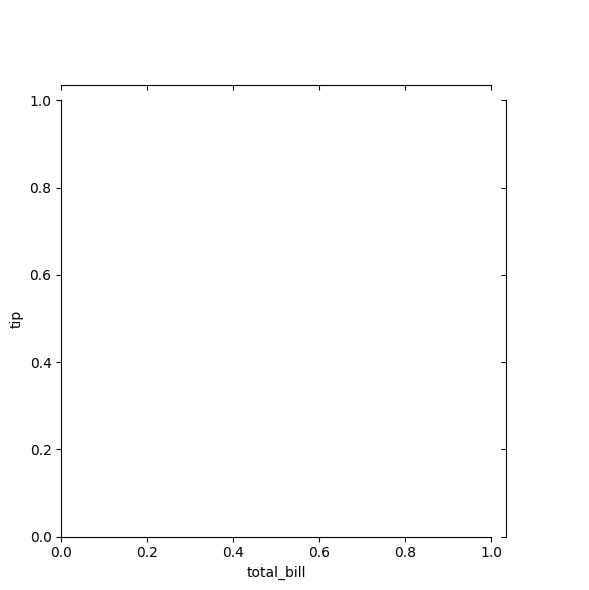

In [10]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

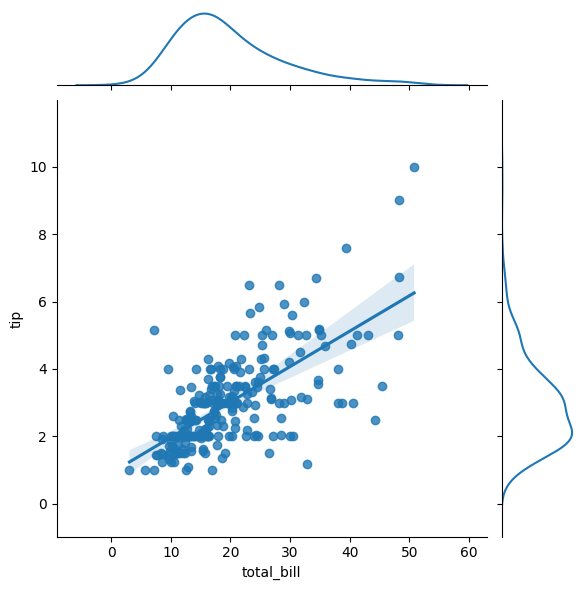

In [11]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.kdeplot)

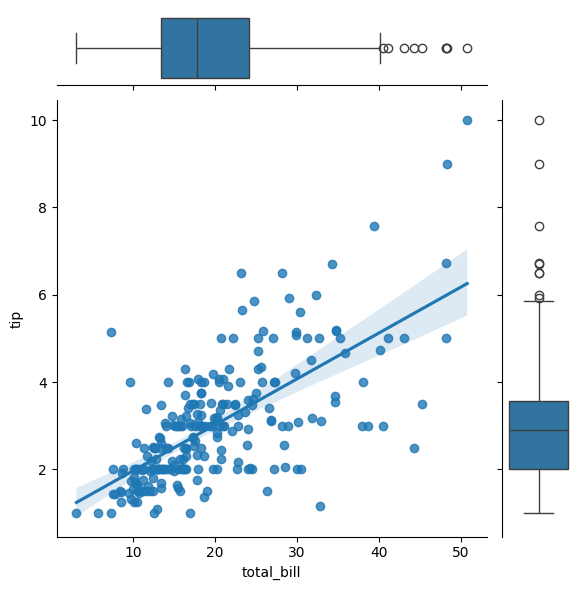

In [14]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.boxplot)

In [ ]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.kdeplot)

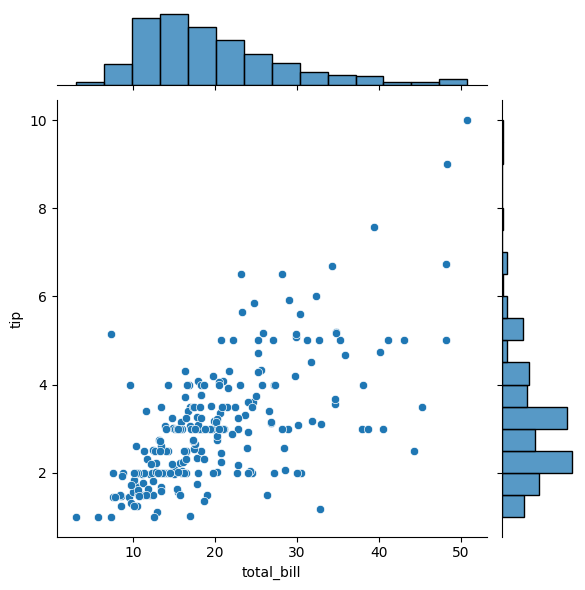

In [6]:
sns.jointplot(data=tips, x='total_bill', y='tip')